In [25]:
!pip install geopandas 
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from geopandas import GeoSeries

Looking in indexes: http://172.17.0.1:3143/root/pypi/+simple/


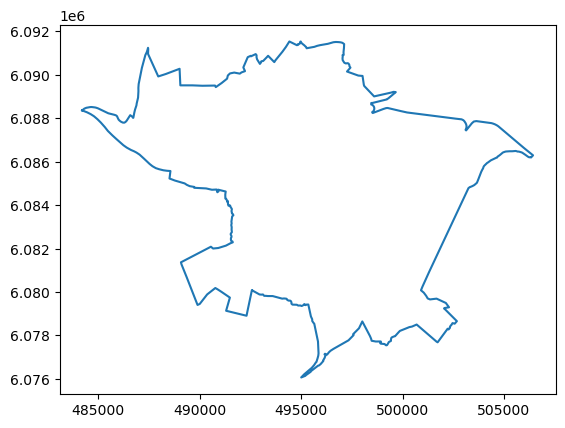

In [13]:
geom = []
filename =  "kaunas.txt"
with open(filename) as f:
  str = [word for line in f for word in line.split(", ")]
geom = []
for i in range(len(str)):
  lon, lat = str[i].split(" ")
  geom.append((float(lon), float(lat)))
p1 = Polygon(geom)
plt.plot(*p1.exterior.xy)

                GRID_ID  METAI                                    PAJAMOS  \
0  500x500mX30800Y61332   2015                                    1178317   
1  500x500mX30850Y61332   2015                                   18121413   
2  500x500mX30900Y61337   2015  Duomenys konfidencialūs|Confidential data   
3  500x500mX30900Y61342   2015                                    1356840   
4  500x500mX30950Y61332   2015                                   17132471   

                                         DSK  IMONIU_SK    A  
0                                          5          3  0.0  
1                                        208          9  0.0  
2  Duomenys konfidencialūs|Confidential data          1  0.0  
3                                         36          5  0.0  
4                                        231         31  2.0  
                   GRID_ID  METAI                                    PAJAMOS  \
5486  500x500mX30800Y61332   2016                                     346003   

Text(0.5, 0.98, 'Income')

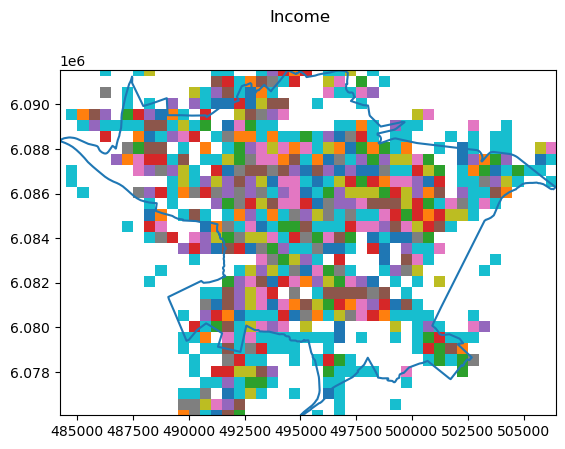

In [15]:
fig, ax =  plt.subplots(1, 1)

geo_data = gpd.read_file('GRID500.shp')
#geo_data = geo_data.to_crs(epsg=4326)
# print few records of initial dataset 
print(geo_data[['GRID_ID','METAI','PAJAMOS', 'DSK', 'IMONIU_SK','A']].head())
geo_data_2016_ = geo_data[geo_data.METAI ==  2016 ]
print(geo_data_2016_[['GRID_ID','METAI','PAJAMOS', 'DSK', 'IMONIU_SK','A']].head())
geo_data_2016_.plot(column = geo_data_2016_.PAJAMOS, ax = ax)

# limit figure boundaries to show Kaunas municipality only
plt.plot(*p1.exterior.xy)
plt.xlim((np.min(p1.exterior.xy[0]), np.max(p1.exterior.xy[0])))
plt.ylim((np.min(p1.exterior.xy[1]), np.max(p1.exterior.xy[1])))
fig.suptitle('Income')

In [67]:
# example, how to get find exact vaue of any parameters value by cooridnates
def getValueByCoords(table,  x, y):
    p1 = Point([x,y])
    #plt.plot(*p1.xy, 'or')
    #print(table.shape[0])
    for i in range(1, table.shape[0]): 
        pp = Polygon(table.iloc[i]['geometry'])
        #print(pp)
        #plt.plot(*pp.exterior.xy, '-k')
        if(pp.contains(p1)):
            print(table.iloc[i])
    #plt.xlim(x-1000, x+1000)
    #plt.ylim(y-1000, y+1000)
getValueByCoords(geo_data_2016_,  497250.5, 6084000.0)

OBJECTID                                                   8112
GRID_ID                                    500x500mX49700Y60837
METAI                                                      2016
IMONIU_SK                                                    23
A                                                           0.0
B_C_D_E                                                     2.0
F                                                           1.0
G_H_I                                                       9.0
J                                                           0.0
K                                                           0.0
L                                                           1.0
M_N                                                         2.0
O_P_Q                                                       2.0
R_S_T_U                                                     6.0
DSK                                                          69
PAJAMOS                                 